# Stock Predictor

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import datetime as dt
import pickle
import time

import warnings
warnings.filterwarnings('ignore')

## Loading data for tranning and testing of Model.

In [17]:
dataset = pd.read_csv("./data/days.csv")

## Extracting required fields from input data.

In [18]:
X = dataset.iloc[:,[0]]
y = dataset.iloc[:,4]

## Changing dates to timestamps.

In [19]:
X['Date'] = pd.to_datetime(X['Date'])
X['Date'] = X.Date.values.astype(np.int64)

# Feature scaling.

In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()


X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
X = X.reshape(-1, 1)

## Creating the regression machine model.

In [22]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', C= 1e3, gamma= 0.2 )

## Loading model from .pickle file.

In [23]:
model_svr_regressor = 'svr_regressor_model_full_data.pickle'
regressor = pickle.load(open(model_svr_regressor, 'rb'))

## Making the Prediction using the Test data.

In [25]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.fit_transform(X)))

<h2>Plotting the Prediction results.</h2>
<p><b>Blue dotted trend line</b> represent the price variation predicted by the machine learning model.</p>


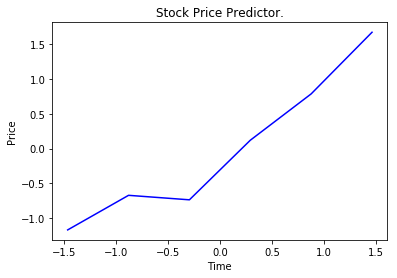

In [26]:
plt.plot(X, y_pred, color="blue")
plt.title("Stock Price Predictor.")
plt.xlabel("Time")
plt.ylabel("Price")

plt.show()

## Defining the variables.

In [27]:
#defining the variables.
lastPrice = 0
currentPrice = 0
currentPnL = []

## Computing PnL 

In [28]:
for index, item in enumerate(y_pred):
    pnl = 0
    if( item > lastPrice ):     
        if index == 0:
            lastPrice = item
            continue        
        
        pnl = item - lastPrice 
        currentPnL.append(pnl)
        
        lastPrice = item            
    else:
        continue

# Showing Total PnL.

In [29]:
totalPnL = sum(currentPnL)

In [30]:
print("Total PnL for Week is: ${}".format(round(totalPnL,2)))

Total PnL for Week is: $1.67
